In [ ]:
import nltk
nltk.download('all')

# **7. 문서 군집화**

## **Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

- 51개의 텍스트 파일로 구성된 데이터 세트
    - 각 파일은 Tripadvisor(호텔), Edmunds.com(자동차), Amazon.com(전자제품) 사이트에서 가져온 리뷰 문서
    - 각 문서는 약 100개 정도의 문장을 가지고 있음


### **데이터 준비**

In [4]:
import pandas as pd
import glob, os

In [ ]:
# 디렉토리 설정
path = './data/topics'

# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

In [5]:
### 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col = None, header = 0,encoding = 'latin1')

    # 절대 경로로 주어진 file 명을 가공
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,topics\accuracy_garmin_nuvi_255W_gps,...
1,topics\bathroom_bestwestern_hotel_sfo,...
2,topics\battery-life_amazon_kindle,...
3,topics\battery-life_ipod_nano_8gb,...
4,topics\battery-life_netbook_1005ha,...


### **TF-IDF 피처 벡터화**

In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

## Lemmatization(Tokenizer)
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english' , \
                             ngram_range = (1,2), min_df = 0.05, max_df = 0.85)

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


### **문서 군집화**

In [8]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [9]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,topics\accuracy_garmin_nuvi_255W_gps,...,2
1,topics\bathroom_bestwestern_hotel_sfo,...,0
2,topics\battery-life_amazon_kindle,...,1
3,topics\battery-life_ipod_nano_8gb,...,1
4,topics\battery-life_netbook_1005ha,...,1


**군집화 결과 확인**

In [10]:
document_df[document_df['cluster_label'] == 0].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
1,topics\bathroom_bestwestern_hotel_sfo,...,0
32,topics\room_holiday_inn_london,...,0
30,topics\rooms_bestwestern_hotel_sfo,...,0
31,topics\rooms_swissotel_chicago,...,0


- 군집 0은 **호텔**에 대한 리뷰로 군집화 된 것을 확인할 수 있음

In [11]:
document_df[document_df['cluster_label'] == 1].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
2,topics\battery-life_amazon_kindle,...,1
3,topics\battery-life_ipod_nano_8gb,...,1
4,topics\battery-life_netbook_1005ha,...,1
19,topics\keyboard_netbook_1005ha,...,1
26,topics\performance_netbook_1005ha,...,1
41,topics\size_asus_netbook_1005ha,...,1
42,topics\sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
44,topics\speed_windows7,...,1


- 군집 1은 **전자기기**에 대한 리뷰로 군집화 된 것을 확인할 수 있음

In [12]:
document_df[document_df['cluster_label'] == 2].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
0,topics\accuracy_garmin_nuvi_255W_gps,...,2
5,topics\buttons_amazon_kindle,...,2
8,topics\directions_garmin_nuvi_255W_gps,...,2
9,topics\display_garmin_nuvi_255W_gps,...,2
10,topics\eyesight-issues_amazon_kindle,...,2
11,topics\features_windows7,...,2
12,topics\fonts_amazon_kindle,...,2
23,topics\navigation_amazon_kindle,...,2
33,topics\satellite_garmin_nuvi_255W_gps,...,2
34,topics\screen_garmin_nuvi_255W_gps,...,2


- 군집 2는 주로 차량용 네비게이션에 대한 리뷰가 군집화 됨

In [13]:
document_df[document_df['cluster_label'] == 3].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
13,topics\food_holiday_inn_london,...,3
14,topics\food_swissotel_chicago,...,3
15,topics\free_bestwestern_hotel_sfo,...,3
20,topics\location_bestwestern_hotel_sfo,...,3
21,topics\location_holiday_inn_london,...,3
24,topics\parking_bestwestern_hotel_sfo,...,3
27,topics\price_amazon_kindle,...,3
28,topics\price_holiday_inn_london,...,3
38,topics\service_bestwestern_hotel_sfo,...,3
39,topics\service_holiday_inn_london,...,3


- 군집 3은 대부분 호텔에 대한 리뷰로 구성되어 있음

In [14]:
document_df[document_df['cluster_label'] == 4].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
6,topics\comfort_honda_accord_2008,...,4
7,topics\comfort_toyota_camry_2007,...,4
16,topics\gas_mileage_toyota_camry_2007,...,4
17,topics\interior_honda_accord_2008,...,4
18,topics\interior_toyota_camry_2007,...,4
22,topics\mileage_honda_accord_2008,...,4
25,topics\performance_honda_accord_2008,...,4
29,topics\quality_toyota_camry_2007,...,4
37,topics\seats_honda_accord_2008,...,4
47,topics\transmission_toyota_camry_2007,...,4


- 군집 4는 자동차에 대한 리뷰로 군집화 됨

> 5개의 군집으로 군집화 결과, 군집이 조금 세분화 된 것을 확인할 수 있다.

In [41]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집의 개수를 줄인 후 다시 군집화 수행
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by = 'cluster_label')

,filename,opinion_text,cluster_label
0,topics\accuracy_garmin_nuvi_255W_gps,...,0
48,topics\updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord t...,0
44,topics\speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep fas...",0
43,topics\speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display o...,0
42,topics\sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it i...,0
41,topics\size_asus_netbook_1005ha,...,0
36,topics\screen_netbook_1005ha,...,0
35,topics\screen_ipod_nano_8gb,...,0
34,topics\screen_garmin_nuvi_255W_gps,...,0
33,topics\satellite_garmin_nuvi_255W_gps,...,0


- 이전에 비해 군집화가 더 잘 수행된 것 같다.

## **군집(Cluster)별 핵심 단어 추출하기**


In [16]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [17]:
# 군집별 top n 핵심 단어, 핵심 단어의 중심 위치 상대값, 대상 파일명을 반환하는 함수

def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features = 10):
    cluster_details = {}

    ## cluster_centers array의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid) 별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    ## 개별 군집별로 iteration하면서 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index를 이용하여 top n 피처 단어 구하기
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구하기
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [18]:
### 출력을 위한 함수

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [19]:
feature_names = tfidf_vect.get_feature_names_out() # 피처명

# 군집별 정보
cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,\
                                  feature_names = feature_names, clusters_num = 3, top_n_features = 10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['topics\\accuracy_garmin_nuvi_255W_gps', 'topics\\battery-life_amazon_kindle', 'topics\\battery-life_ipod_nano_8gb', 'topics\\battery-life_netbook_1005ha', 'topics\\buttons_amazon_kindle', 'topics\\directions_garmin_nuvi_255W_gps', 'topics\\display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['topics\\comfort_honda_accord_2008', 'topics\\comfort_toyota_camry_2007', 'topics\\gas_mileage_toyota_camry_2007', 'topics\\interior_honda_accord_2008', 'topics\\interior_toyota_camry_2007', 'topics\\mileage_honda_accord_2008', 'topics\\performance_honda_accord_2008']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파

- 리뷰가 대체로 잘 군집화 된 것을 확인할 수 있음

# **10. 텍스트 분석 실습**

## **10-1. 데이터 전처리**

In [20]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd

mercari_df= pd.read_csv('./data/mercari_train.tsv',sep = '\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


- train_id: 데이터 id
- name: 제품명
- item_condition_id: 판매자가 제공하는 제품 상태
- category_name: 카테고리명
- brand_name: 브랜드 이름
- price: 제품 가격, 예측을 위한 target 속성
- shipping: 배송비 무료 여부/ 1: 무료(판매자 부담), 0: 유료(구매자 부담)
- item_description: 제품에 대한 설명

In [21]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


- ```brand_name``` 칼럼의 경우 매우 많은 Null 값을 포함하고 있음
    - 가격에 영향을 미치는 중요 요인으로 판단됨
- ```category_name```은 약 6300건의 null 데이터를 가지고 있음
> 이후 적절한 문자열로 치환 예정

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

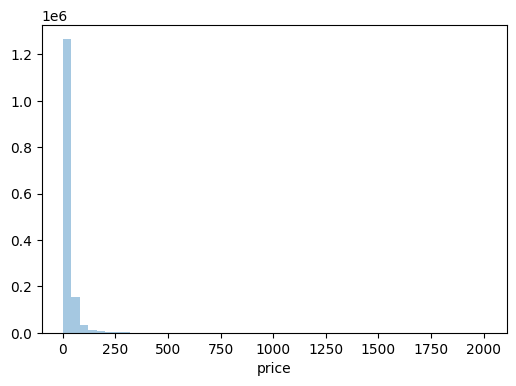

In [22]:
### Target 피처의 분포 파악하기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize = (6,4))
sns.distplot(y_train_df, kde = False)

- 작은 가격대에 분포가 몰려 있음(-> 왜곡된 분포)

<AxesSubplot:xlabel='price'>

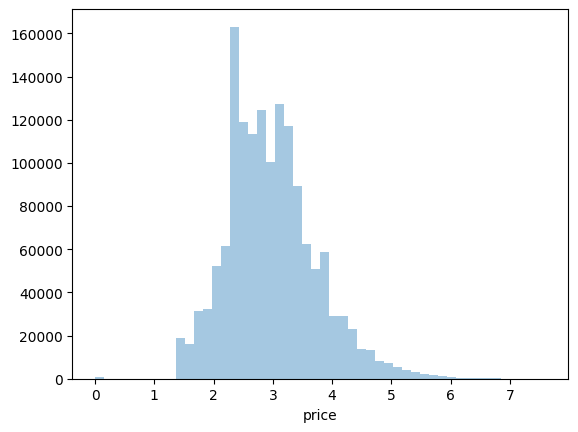

In [23]:
## 로그 변환 수행

import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde = False)

- 비교적 **정규 분포**에 가까운 데이터를 이루게 됨

In [24]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [42]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print()
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64

item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


- shipping: 배송비 유무
    - 비교적 균일한 분포를 보임
- item_condition_id: 판매자가 제공하는 제품 상태
    - 1,2,3 값이 주를 이루고 있음

In [26]:
# 결측치(Null) 확인

boolean_cond= mercari_df['item_description'] == 'No description yet' # Null 값과 비슷하게 활용 불가
mercari_df[boolean_cond]['item_description'].count()

82489

In [43]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

In [27]:
## category_name 살펴보기

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))
# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [28]:
### 결측치(Null) 값 처리

mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value = 'Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value = 'Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value = 'Other_Null')

# 각 컬럼별로 Null값 건수 확인
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

- 결측치가 제대로 처리됨

## **10-2. 피처 인코딩과 피처 벡터화**

- 선형 회귀의 경우 One-hot Encoding 적용이 훨씬 선호됨

In [44]:
## 1. brand_name: 상품의 브랜드명
# 대부분 명료한 문자열로 돼 있기에 One-hot Encoding 적용

print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print()
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810

brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [45]:
## 2. name: 상품명
# 유형이 매우 많고, 적은 단어 위주의 텍스트 형태이기에 Count 기반 피처 벡터화를 적용

print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print()
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 1225273

name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [31]:
### 3. item_description: 상품에 대한 간단한 설명
# 평균 문자열이 145자로 비교적 크기에 TF-IDF 변환 적용

pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 개수: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [32]:
### 인코딩 및 피처 벡터화 수행

# name 속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 feature vectorization 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1,3) , stop_words = 'english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


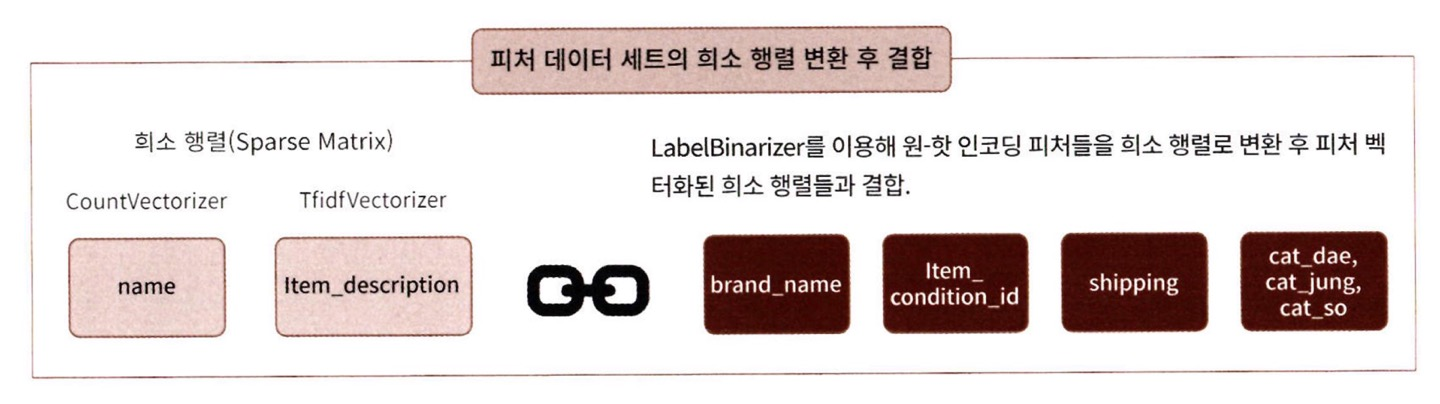

In [33]:
from sklearn.preprocessing import LabelBinarizer

## brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output = True) # 희소 행렬
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name']) # One-hot Encoding

lb_item_cond_id = LabelBinarizer(sparse_output = True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output = True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output = True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output = True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output = True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [34]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


- 인코딩 변환된 데이터 세트가 CSR 형태로 변환된 ```csr_matrix``` 타입임

In [35]:
### 인코딩 된 데이터를 하나로 결합

from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
            X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


63

## **10-3. 모델링**

### **10-3-1. 릿지 회귀 모델 구축 및 평가**

- 낮은 가격(price)보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해 **RMSLE**를 활용

In [36]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds):
    # 원본 데이터는 log1p로 변환되었으므로 expm1으로 원복 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    
    return rmsle_result

In [37]:
### 데이터 생성 및 학습/예측/평가 logic

import gc
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack을 이용하여 sparse matrix 결합
    X = hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'],
                                                      test_size = 0.2, random_state = 156)

    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # 사용 완료 시 데이터 삭제(for 메모리 관리)
    del X, X_train, X_test, y_train
    gc.collect()

    return preds , y_test

In [38]:
## 속성의 영향력 확인

linear_model = Ridge(solver = "lsqr", fit_intercept = False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model , matrix_list = sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.5018919352796904
Item Description을 포함한 rmsle 값: 0.47121971273337154


### **10-3-2. LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가**

In [39]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators = 200, learning_rate = 0.5, num_leaves = 125, random_state = 156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list = sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 0.45651821264982534


- 앙상블 방식으로 예측 결합

In [40]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.4504815580394816
